# Virus Propagation

In [1]:
# Required imports
%matplotlib inline

import math
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.sparse
from scipy.sparse import linalg as LA

In [2]:
# Parameter Initializations
beta1 = 0.20
beta2 = 0.01

delta1 = 0.70
delta2 = 0.60

global_k = 200

## Q1 SIS Model

In [3]:
# Function to read network file and create a networkx graph
def create_graph():
    path = './static.network'
    fp = open(path, 'r')
    # vertices, edges = [int(line) for line in fp.readline().split(' ')]
    graph = nx.Graph()
    next(fp)
    for line in fp:
        u, v = [int(x) for x in line.split(' ')]
        graph.add_edge(u, v)
    
    return graph

In [4]:
# Function to get maximum eigen value of a graph
def get_max_eig(graph):
    adj = nx.to_numpy_matrix(graph)
    max_eig = max(LA.eigsh(adj, k=1, which='LM', return_eigenvectors=False, mode='normal'))
    return np.real(max_eig)

In [5]:
# Function to calculate strength of virus using formula: ((maximum eigen value) * beta) / (delta)
def virus_strength(max_eig, beta, delta):
    strength = max_eig * beta / delta
    return strength
    

**a) Will the infection spread across the network (i.e., result on an epidemic), or will it die quickly**

In [6]:
g = create_graph()
max_eig = get_max_eig(g)
print 'Maximum Eigen Value of Graph : ', max_eig

Maximum Eigen Value of Graph :  43.85469576074462


In [7]:
# Compute virus strength for beta 1 and delta 1
s = virus_strength(max_eig, beta1, delta1)
print 'Effective Virus Strength : ', s

Effective Virus Strength :  12.529913074498465


> Ans: Since the effective strength is 12.53 ie greater than 1, the virus will result in an epidemic for beta1 and delta1.


In [8]:
# Compute virus strength for beta 2 and delta 2
s = virus_strength(max_eig, beta2, delta2)
print 'Effective Virus Strength : ', s

Effective Virus Strength :  0.7309115960124104


> Ans: Since the effective strength is 0.73 ie less than 1, the virus will not result in an epidemic for beta2 and delta2


**b) Keeping δ fixed, analyze how the value of β affects the effective strength of the virus
(suggestion: plot your results). What is the minimum transmission probability (β) that results in a
network-wide epidemic?**



Text(0.5,1,'Effect of Varying Beta on Virus Strength [Delta = 0.60]')

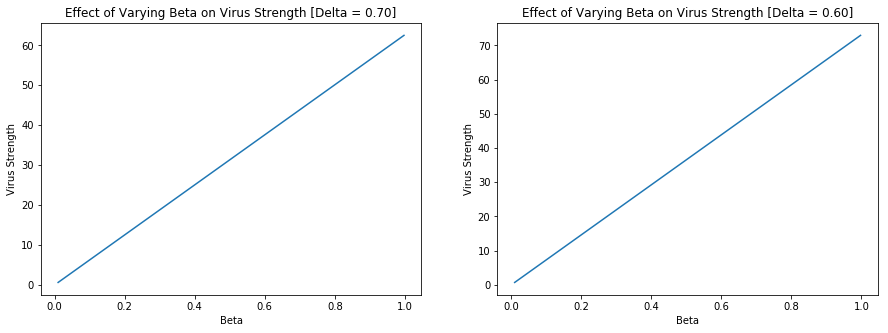

In [9]:
# Compute virus strength for varying beta and plot the results
betas = np.arange(0.01, 1.00, 0.0025)
strengths1 = []
strengths2 = []
for b in betas:
    strengths1.append(virus_strength(max_eig, b, delta1))
    strengths2.append(virus_strength(max_eig, b, delta2))


fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(betas, strengths1)
plt.xlabel('Beta')
plt.ylabel('Virus Strength')
plt.title('Effect of Varying Beta on Virus Strength [Delta = 0.70]')

plt.subplot(1, 2, 2)
plt.plot(betas, strengths2)
plt.xlabel('Beta')
plt.ylabel('Virus Strength')
plt.title('Effect of Varying Beta on Virus Strength [Delta = 0.60]')


In [10]:
# For delta 1
for b, s in zip(betas, strengths1):
    if s >= 1.0:
        min_beta1 = b
        break
print min_beta1

0.0175


In [11]:
# For delta 2
for b, s in zip(betas, strengths2):
    if s >= 1.0:
        min_beta2 = b
        break
print min_beta2

0.015000000000000001


> Ans:
> When δ1 = 0.70 minimum beta for which virus strength > 1 and therefore results in an epidemic is : 0.0175  
When δ2 = 0.60 minimum beta for which virus strength > 1 and therefore results in an epidemic is : 0.015

**c) Keeping β fixed, analyze how the value of δ affects the effective strength of the virus
(suggestion: plot your results). What is the maximum healing probability (δ) that results in a
network-wide epidemic?**



Text(0.5,1,'Effect of Varying Delta on Virus Strength [Beta = 0.01]')

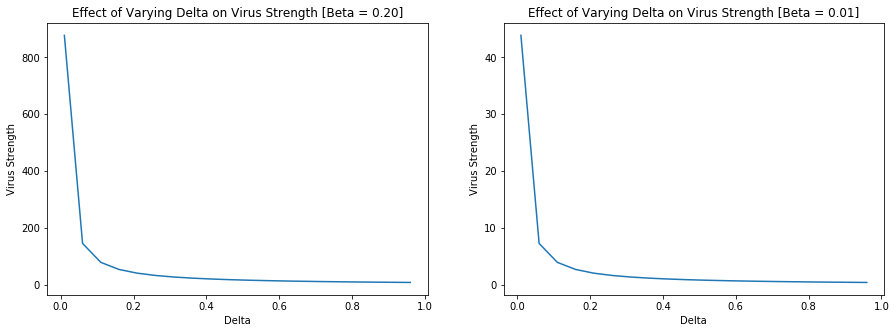

In [12]:
# Compute virus strength for varying delta and plot the results
deltas = np.arange(0.01, 1.00, 0.05)
strengths1 = []
strengths2 = []
for d in deltas:
    strengths1.append(virus_strength(max_eig, beta1, d))
    strengths2.append(virus_strength(max_eig, beta2, d))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(deltas, strengths1)
plt.xlabel('Delta')
plt.ylabel('Virus Strength')
plt.title('Effect of Varying Delta on Virus Strength [Beta = 0.20]')

plt.subplot(1, 2, 2)
plt.plot(deltas, strengths2)
plt.xlabel('Delta')
plt.ylabel('Virus Strength')
plt.title('Effect of Varying Delta on Virus Strength [Beta = 0.01]')

In [13]:
# For beta 1
max_delta1 = -float('inf')
for d, s in zip(deltas, strengths1):
    if s >= 1.0:
        max_delta1 = max(max_delta1, d)
print max_delta1

0.9600000000000001


In [14]:
# For beta 2
max_delta2 = -float('inf')
for d, s in zip(deltas, strengths2):
    if s >= 1.0:
        max_delta2 = max(max_delta2, d)
print max_delta2

0.41000000000000003


> Ans:
> When β1 = 0.20 maximum delta for which virus strength > 1 and therefore results in an epidemic is : 0.96  
When β2 = 0.01 maximum delta for which virus strength > 1 and therefore results in an epidemic is : 0.41

## Q2 Simulation

In [15]:
# Function to run one simulation
def simulate(graph, beta, delta):
    g = graph.copy()
    n = g.number_of_nodes()
    c = math.ceil(n/10)
    
    prev_infected = set(random.sample(range(n), int(c)))
    infected_at_t = [len(prev_infected)]
    
    for _ in range(100):
        new_infected = set()
        for node in prev_infected:
            nbrs = list(g.neighbors(node))
            x = int(beta*len(nbrs))
            curr_infected = random.sample(nbrs, x)
            new_infected.update(curr_infected)
        
        x = int(math.ceil(delta * len(prev_infected)))
        healed = set(random.sample(prev_infected, x))
        prev_infected.update(new_infected)
        
        prev_infected -= healed
        infected_at_t.append(len(prev_infected))
    
    return infected_at_t
                    

In [16]:
# Function to run the required number of sumilations for specified parameters and plot results
def run(graph, beta, delta, policy='None', k=global_k):
    
    print '\nRunning Virus Propagation Simulation '
    print '\nPARAMETERS : β = ', beta, '\tδ = ', delta, '\tk = ', k, '\tImmunization Policy = ', policy, '\tt = 100'
    
    if policy == 'a':
        g = policy_a(graph, k)
    elif policy == 'b':
        g = policy_b(graph, k)
    elif policy == 'c':
        g = policy_c(graph, k)
    elif policy == 'd':
        g = policy_d(graph, k)
    else:
        g = graph
    
    
    new_max_eig = get_max_eig(g)
    print '\nMaximum Eigen Value of Graph : ', new_max_eig
    strength = virus_strength(new_max_eig, beta, delta)
    print '\nEffective Virus Strength : ', strength, '\n'
    
    
    simulation_results = []
    avg = []
    for idx in range(10):
        print 'Simulation ', idx
        res = simulate(g, beta, delta)
        simulation_results.append(res)

    for i in range(100):
        avg.append(np.mean([simulation_results[j][i] for j in range(10)]))

    print '\nAverage Number of Nodes Initially Infected : ', avg[0]
    print '\nAverage Number of Nodes Finally Infected : ', avg[-1]

    if avg[0] <= avg[-1]:
        print '\nRESULT : Virus has caused an epidemic'
    else:
        print '\nRESULT : Virus epidemic was prevented'

    
    f = plt.figure(figsize=(7,5))
    plt.plot(avg)
    plt.xlabel('Time')
    plt.ylabel('Number of Infected Nodes')
    plt.show()
    
    
    return strength
    


Running Virus Propagation Simulation 

PARAMETERS : β =  0.2 	δ =  0.7 	k =  200 	Immunization Policy =  None 	t = 100

Maximum Eigen Value of Graph :  43.854695760744605

Effective Virus Strength :  12.52991307449846 

Simulation  0
Simulation  1
Simulation  2
Simulation  3
Simulation  4
Simulation  5
Simulation  6
Simulation  7
Simulation  8
Simulation  9

Average Number of Nodes Initially Infected :  571.0

Average Number of Nodes Finally Infected :  973.4

RESULT : Virus has caused an epidemic


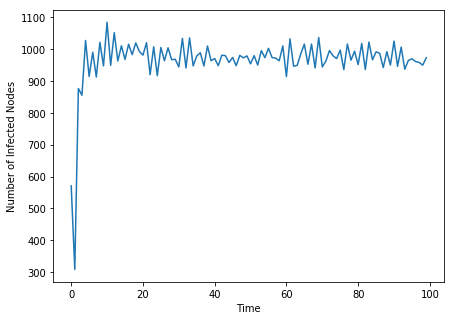

In [17]:
# Run simulation for beta 1, delta 1
g = create_graph()
s1 = run(g, beta1, delta1)

**The virus spread throughout the network resulting in an epidemic, which is the same we expected as in 1 a.**


Running Virus Propagation Simulation 

PARAMETERS : β =  0.01 	δ =  0.6 	k =  200 	Immunization Policy =  None 	t = 100

Maximum Eigen Value of Graph :  43.85469576074463

Effective Virus Strength :  0.7309115960124106 

Simulation  0
Simulation  1
Simulation  2
Simulation  3
Simulation  4
Simulation  5
Simulation  6
Simulation  7
Simulation  8
Simulation  9

Average Number of Nodes Initially Infected :  571.0

Average Number of Nodes Finally Infected :  0.0

RESULT : Virus epidemic was prevented


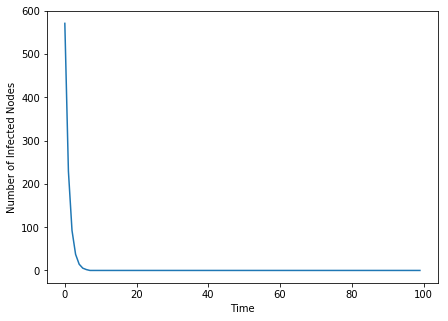

In [18]:
# Run simulation for beta 2, delta 2
g = create_graph()
s2 = run(g, beta2, delta2)

**The infection in the network quickly died out, which is the same we expected as in 1 d.**

## Q3 Immunization

### a) Optimal Immunization Policy 

> The most optimal immunization policy is immunizing the k nodes whose removal causes largest drop in highest eigen value of the graph (λ1). However, this would require calculating the λ1 drop for each possible subset of k nodes, resulting in a time complexity of O(n^k). This would be computationally infeasible.   

In [19]:
def policy_a(graph_a, k):
    dels = random.sample(range(graph_a.number_of_nodes()), k)
    graph_a.remove_nodes_from(dels)
    graph_a = nx.convert_node_labels_to_integers(graph_a)
    return graph_a

In [20]:
def policy_b(graph_b, k):
    d = nx.degree(graph_b)
    dels = [a for a, b in sorted(list(d), key=lambda x:x[1], reverse=True)]
    graph_b.remove_nodes_from(dels[:k])
    graph_b = nx.convert_node_labels_to_integers(graph_b)
    return graph_b

In [21]:
def policy_c(graph_c, k):
    for i in range(k):
        d = nx.degree(graph_c)
        dels = max(list(d), key=lambda x:x[1])[0]
        graph_c.remove_node(dels)
    graph_c = nx.convert_node_labels_to_integers(graph_c)
    return graph_c
        

In [22]:
def policy_d(graph_d, k):
    n = graph_d.number_of_nodes()
    adj = nx.to_numpy_matrix(graph_d)
    val, vec = LA.eigsh(adj, k=1, which='LM', return_eigenvectors=True, mode='normal')
    vec_list = [(u, abs(v)) for u, v in enumerate(vec)]
    vec_list.sort(key=lambda x:x[1], reverse=True)
    dels = [vec_list[i][0] for i in range(k)]
    graph_d.remove_nodes_from(dels)
    graph_d = nx.convert_node_labels_to_integers(graph_d)
    return graph_d

In [23]:
# Function to get vaccine analysis for given parameters and policy
def vaccine_analysis(graph_, beta, delta, k_vals, policy):
    strengths = []
    graph = graph_.copy()
    
    print '\n----------------------------------------------------\n'
    print 'Running Vaccine Analysis for Policy ', policy.upper()
    
    if policy == 'a':
        for k in k_vals:
            print 'k: ', k,
            new_graph = policy_a(graph, k)
            max_eig = get_max_eig(new_graph)
            s = virus_strength(max_eig, beta, delta)
            strengths.append(s)
            print '\tstrength : ', s 
            
    elif policy == 'b':
        for k in k_vals:
            print 'k: ', k,
            new_graph = policy_b(graph, k)
            max_eig = get_max_eig(new_graph)
            s = virus_strength(max_eig, beta, delta)
            strengths.append(s)
            print '\tstrength : ', s 
            
    elif policy == 'c':
        for k in k_vals:
            print 'k: ', k,
            new_graph = policy_c(graph, k)
            max_eig = get_max_eig(new_graph)
            s = virus_strength(max_eig, beta, delta)
            strengths.append(s)
            print '\tstrength : ', s 
            
    elif policy == 'd':
        for k in k_vals:
            print 'k: ', k,
            new_graph = policy_d(graph, k)
            max_eig = get_max_eig(new_graph)
            s = virus_strength(max_eig, beta, delta)
            strengths.append(s)
            print '\tstrength : ', s 
            
    else:
        new_graph = graph
        for k in k_vals:
            print 'k: ', k,
            max_eig = get_max_eig(new_graph)
            s = virus_strength(max_eig, beta, delta)
            strengths.append(s)
            print '\tstrength : ', s 
        
    f = plt.figure(figsize=(7,5))
    plt.plot(k_vals, strengths)
    plt.xlabel('Number of Vaccines (k)')
    plt.ylabel('Virus Strength')
    
    return strengths    

### Policy A

#### b)
**Intuition -**  
This immunization policy randomly selects k nodes. The only intuition here is that if we run it several times, it will succeed in containing the epidemic at least few times.  

#### c)
**Pseudocode -**  
` procedure policy_a(graph, k):
    n <- get_nodes(graph)
    immunize_nodes <- choose_random(n, k)
    remove_from_graph(immunize_nodes)
`      


**Time Complexity -**  
O(k) for selecting and removing k nodes; O(kn²) for updating adjacency matrix. Therefore time complexity is **O(kn²).**  

#### d)
**Effective Strength -**  
The effective strength of the virus is 12.39  
**Result -**  
The virus results in an epidemic.  
#### e)
**Minimum number of vaccines necessary to prevent a network-wide epidemic -**   
This number is very large. The policy is unable to prevent an epidemic even when the number of vaccines is as high as 300, the virus strength is around 9.   

#### f)
**Do the results of the simulation agree with your conclusions in (3d) -**  
The simulation plot shows that the virus always persists and results in an epidemic, which is consistent with the result in 3d.


Running Virus Propagation Simulation 

PARAMETERS : β =  0.2 	δ =  0.7 	k =  200 	Immunization Policy =  a 	t = 100

Maximum Eigen Value of Graph :  43.12908914672423

Effective Virus Strength :  12.322596899064067 

Simulation  0
Simulation  1
Simulation  2
Simulation  3
Simulation  4
Simulation  5
Simulation  6
Simulation  7
Simulation  8
Simulation  9

Average Number of Nodes Initially Infected :  551.0

Average Number of Nodes Finally Infected :  896.5

RESULT : Virus has caused an epidemic


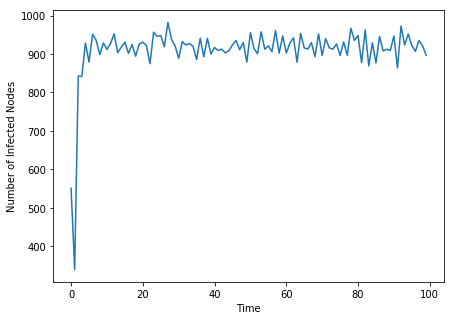


----------------------------------------------------

Running Vaccine Analysis for Policy  A
k:  200 	strength :  12.119374523582973
k:  210 	strength :  11.857131666276068
k:  220 	strength :  11.616223359759367
k:  230 	strength :  11.278738230203858
k:  240 	strength :  11.072454927971515
k:  250 	strength :  10.826518252026528
k:  260 	strength :  10.068194954490863
k:  270 	strength :  9.787046269587014
k:  280 	strength :  9.551430571492817
k:  290 	strength :  9.382249979179672


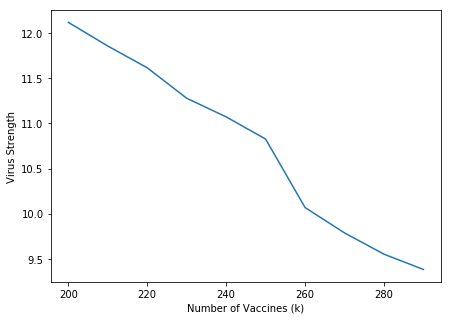

In [24]:
g = create_graph()
s1a = run(g, beta1, delta1, 'a')
k_vals = range(200, 300, 10)
strengths = vaccine_analysis(g, beta1, delta1, k_vals, 'a')

### Policy B

#### b)
**Intuition -**   
This immunization policy selects the k highest degree nodes to immunize. The intuition here is that the nodes with higher degree are connected to maximum nodes and have higher chance of spreading the infection so immunizing these nodes should help contain the epidemic.

#### c)
**Pseudocode -**  
` procedure policy_a(graph, k):
    n <- get_nodes(graph)
    degree <- get_degrees(graph)
    sorted_nodes <- sort(degrees)
    immunize_nodes <- sorted_nodes(1:k)
    remove_from_graph(immunize_nodes)
`      


**Time Complexity -**  
O(n²) for calculatig degree matrix; O(nlogn) for sorting degrees; O(kn²) for updating adjacency matrix. Therefore time complexity is **O(kn²).**  

#### d)
**Effective Strength -**  
The effective strength of the virus is 1.08  
**Result -**  
The epidemic was prevented.  
#### e)
**Minimum number of vaccines necessary to prevent a network-wide epidemic -**   
Around 240 vacciness are sufficient to prevent the epidemic.   

#### f)
**Do the results of the simulation agree with your conclusions in (3d) -**  
The simulation plot shows that the epidemic is contained, which is consistent with the result in 3d.


Running Virus Propagation Simulation 

PARAMETERS : β =  0.2 	δ =  0.7 	k =  200 	Immunization Policy =  b 	t = 100

Maximum Eigen Value of Graph :  3.780964180823328

Effective Virus Strength :  1.0802754802352366 

Simulation  0
Simulation  1
Simulation  2
Simulation  3
Simulation  4
Simulation  5
Simulation  6
Simulation  7
Simulation  8
Simulation  9

Average Number of Nodes Initially Infected :  551.0

Average Number of Nodes Finally Infected :  0.0

RESULT : Virus epidemic was prevented


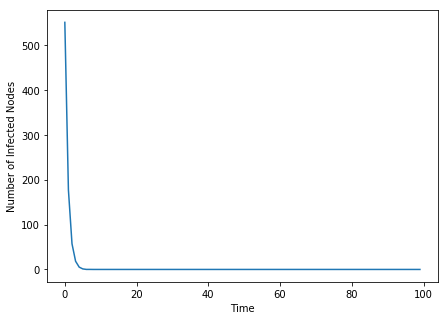


----------------------------------------------------

Running Vaccine Analysis for Policy  B
k:  200 	strength :  0.6807742485388755
k:  210 	strength :  0.46229542535711354
k:  220 	strength :  -0.28571428571428625
k:  230 	strength :  0.285714285714286
k:  240 	strength :  0.0
k:  250 	strength :  0.0
k:  260 	strength :  0.0
k:  270 	strength :  0.0
k:  280 	strength :  0.0
k:  290 	strength :  0.0


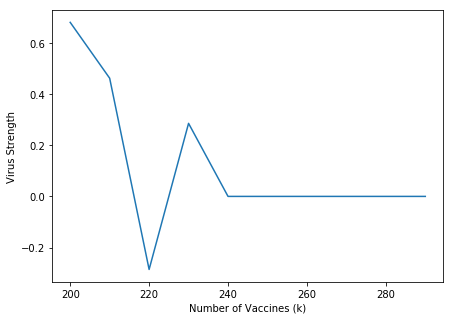

In [25]:
g = create_graph()
s1b = run(g, beta1, delta1, 'b')
k_vals = range(200, 300, 10)
strengths = vaccine_analysis(g, beta1, delta1, k_vals, 'b')

### Policy C

#### b)
**Intuition -**   
This immunization policy is a modification of policy B. Here too we select the k highest degree nodes to immunize. But the change is that we iteratively remove the highest degree node and re-calculate the adjacency matrix after each removal. This is repeated k times. The intuition here is that each removal results in changes to the graph so it is necessary to remove them one at a time.


#### c)
**Pseudocode -**  
``` procedure: policy_a(graph, k):
        for i : 1 -> k times:
            n <- get_nodes(graph)
            degree <- get_degrees(graph)
            sorted_nodes <- sort(degrees)
            immunize_node <- sorted_nodes[0] # highest degree node
            remove_from_graph(immunize_node)
        end for
```    


**Time Complexity -**  
O(kn²) for calculatig degree matrix; O(knlogn) for sorting degrees; O(k²n²) for updating adjacency matrix. Therefore time complexity is **O(k²n²).**  

#### d)
**Effective Strength -**  
The effective strength of the virus is 1.08  
**Result -**  
The epidemic was prevented.  
#### e)
**Minimum number of vaccines necessary to prevent a network-wide epidemic -**   
Around 190 vacciness are sufficient to prevent the epidemic.   

#### f)
**Do the results of the simulation agree with your conclusions in (3d) -**  
The simulation plot shows that the epidemic is contained, which is consistent with the result in 3d.


Running Virus Propagation Simulation 

PARAMETERS : β =  0.2 	δ =  0.7 	k =  200 	Immunization Policy =  c 	t = 100

Maximum Eigen Value of Graph :  3.795821888317992

Effective Virus Strength :  1.0845205395194264 

Simulation  0
Simulation  1
Simulation  2
Simulation  3
Simulation  4
Simulation  5
Simulation  6
Simulation  7
Simulation  8
Simulation  9

Average Number of Nodes Initially Infected :  551.0

Average Number of Nodes Finally Infected :  0.0

RESULT : Virus epidemic was prevented


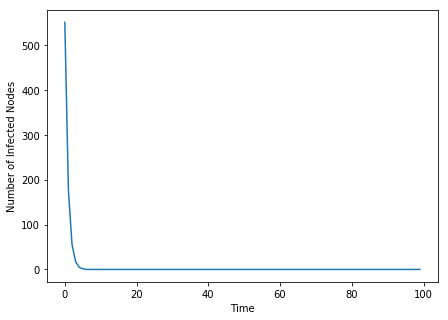


----------------------------------------------------

Running Vaccine Analysis for Policy  C
k:  150 	strength :  0.6826780860279176
k:  160 	strength :  -0.5148393530870969
k:  170 	strength :  -0.2857142857142861
k:  180 	strength :  0.28571428571428614
k:  190 	strength :  0.0
k:  200 	strength :  0.0
k:  210 	strength :  0.0
k:  220 	strength :  0.0
k:  230 	strength :  0.0
k:  240 	strength :  0.0
k:  250 	strength :  0.0
k:  260 	strength :  0.0
k:  270 	strength :  0.0
k:  280 	strength :  0.0
k:  290 	strength :  0.0


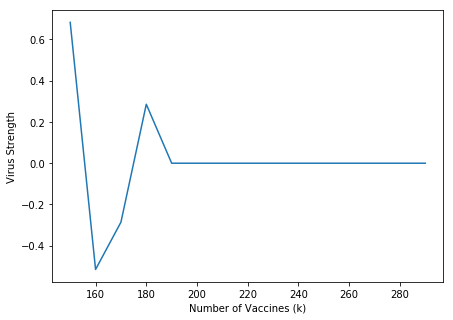

In [26]:
g = create_graph()
s1c = run(g, beta1, delta1, 'c')
k_vals = range(150, 300, 10)
strengths = vaccine_analysis(g, beta1, delta1, k_vals, 'c')

### Policy D

#### b)
**Intuition -**   
This immunization policy selects k nodes corresponding to the largest values in the eigen vector of the highest eigen value to immunize. The intuition here is that removing these nodes will result in decrease of largest eigen value and therefore cause decrease in virus strength.


#### c)
**Pseudocode -**  
`procedure: policy_a(graph, k):
        n <- get_nodes(graph)
        eigen_val, eigen_vec <- get_top_eigen_value_vector(graph)
        sorted_node_index <- sort(absolute_values(eigen_vec))
        immunize_node <- sorted_nodes[1:k]
        remove_from_graph(immunize_node)
`    


**Time Complexity -**  
O(n²) for calculatig eigen value/vector; O(nlogn) for sorting eigen vector; O(kn²) for removing nodes and  updating adjacency matrix. Therefore time complexity is **O(kn²).**  

#### d)
**Effective Strength -**  
The effective strength of the virus is 3.07  
**Result -**  
The epidemic was prevented.  
#### e)
**Minimum number of vaccines necessary to prevent a network-wide epidemic -**   
Around 1300 vacciness are sufficient to prevent the epidemic.   

#### f)
**Do the results of the simulation agree with your conclusions in (3d) -**  
The simulation plot shows that the epidemic is contained, which is consistent with the result in 3d.


Running Virus Propagation Simulation 

PARAMETERS : β =  0.2 	δ =  0.7 	k =  200 	Immunization Policy =  d 	t = 100

Maximum Eigen Value of Graph :  10.746847588034766

Effective Virus Strength :  3.070527882295648 

Simulation  0
Simulation  1
Simulation  2
Simulation  3
Simulation  4
Simulation  5
Simulation  6
Simulation  7
Simulation  8
Simulation  9

Average Number of Nodes Initially Infected :  551.0

Average Number of Nodes Finally Infected :  50.6

RESULT : Virus epidemic was prevented


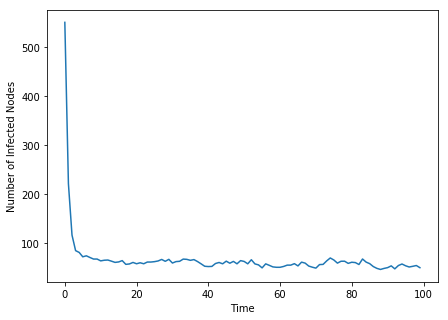


----------------------------------------------------

Running Vaccine Analysis for Policy  D
k:  500 	strength :  2.8429622354681365
k:  600 	strength :  2.615381444392771
k:  700 	strength :  2.461739929377762
k:  800 	strength :  -2.3043320466146016
k:  900 	strength :  2.0996984166213317
k:  1000 	strength :  1.874880963773415
k:  1100 	strength :  -1.1091849484861418
k:  1200 	strength :  0.9003281020073383
k:  1300 	strength :  -0.7559289460184543
k:  1400 	strength :  0.7559289460184541
k:  1500 	strength :  0.6388765649999406
k:  1600 	strength :  -0.638876564999941
k:  1700 	strength :  -0.63887656499994
k:  1800 	strength :  0.6388765649999404
k:  1900 	strength :  0.6388765649999396


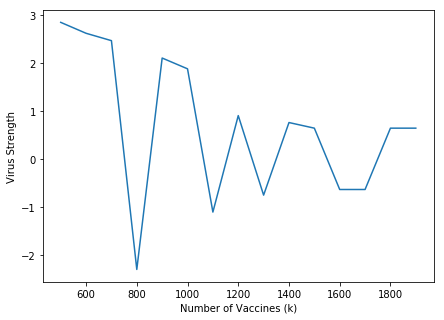

In [27]:
g = create_graph()
s1d = run(g, beta1, delta1, 'd')
k_vals = range(500, 2000, 100)
strengths = vaccine_analysis(g, beta1, delta1, k_vals, 'd')